## Analysis of selected features

In this section, I will generate use to feature importance generated by all the models to find out whats general among the different models and also what is the difference between the different impute levels. 

In [1]:
import pandas as pd 
import datetime
import numpy as np 
import scipy as sp
from scipy.stats import mode
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from joblib import dump, load

In [42]:
#load feature Importances for all levels for different levels of imputations: 
rf_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/RandomForestClassifier_mean_upto_30.csv', index_col=0) 
ab_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/AdaBoostClassifier_mean_upto_30.csv', index_col=0)
bc_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/BaggingClassifier_mean_upto_30.csv', index_col=0)
lr_30pc_mean = pd.read_csv('../data/Models/Feature_Importance/LogisticRegression_mean_upto_30.csv', index_col=0)


rf_50pc_model = pd.read_csv('../data/Models/Feature_Importance/RandomForestClassifier_modeled_upto_50.csv', index_col=0) 
ab_50pc_model = pd.read_csv('../data/Models/Feature_Importance/AdaBoostClassifier_modeled_upto_50.csv', index_col=0)
bc_50pc_model = pd.read_csv('../data/Models/Feature_Importance/BaggingClassifier_modeled_upto_50.csv', index_col=0)
lr_50pc_model = pd.read_csv('../data/Models/Feature_Importance/LogisticRegression_modeled_upto_50.csv', index_col=0)



In [5]:
rf = rf_30pc_mean.mean()
ab = ab_30pc_mean.mean()
lr = lr_30pc_mean.mean()
bc = bc_30pc_mean.mean()
features_30pc = pd.concat([rf.rename('rf'), ab.rename('ab'),  lr.rename('lr'), bc.rename('bc')], axis=1)
features_30pc.head()
features = features_30pc.index


In [6]:
from sklearn import preprocessing

x = features_30pc.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
features_30pc_scaled = min_max_scaler.fit_transform(x)
features_30pc_scaled = pd.DataFrame(features_30pc_scaled)
features_30pc_scaled.columns = ['RandomForest', 'Adaboost', 'Logistic Regression', 'Bagging']

In [7]:
features_30pc_scaled.head()

,RandomForest,Adaboost,Logistic Regression,Bagging
0,0.075484,0.512387,0.161195,0.022451
1,0.040531,0.283024,0.673486,0.015042
2,0.078548,0.169029,0.545801,0.010761
3,1.000000,1.000000,0.297666,1.000000
4,0.171509,0.435622,0.551138,0.018917


In [52]:
features_30pc_scaled['feature'] = features_30pc.index

In [47]:
features_30pc_ordered_rf= features_30pc_scaled.sort_values(by = 'RandomForest', axis=0, ascending=False)
features_30pc_ordered_rf = features_30pc_ordered_rf.head(100)

features_30pc_ordered_bg = features_30pc_scaled.sort_values(by = 'Bagging', axis=0, ascending=False)
features_30pc_ordered_bg = features_30pc_ordered_bg.head(100)

features_30pc_ordered_ab = features_30pc_scaled.sort_values(by = 'Adaboost', axis=0, ascending=False)
features_30pc_ordered_ab = features_30pc_ordered_ab.head(100)

features_30pc_ordered_lr = features_30pc_scaled.sort_values(by = 'Logistic Regression', axis=0, ascending=False)
features_30pc_ordered_lr = features_30pc_ordered_lr.head(100)


In [10]:
#lets look at the top 50 features
features_30pc_ordered_rf_melt = pd.melt(features_30pc_ordered_rf.head(50), id_vars="feature", var_name="model", value_name="importance")
features_30pc_ordered_lr_melt = pd.melt(features_30pc_ordered_lr.head(50), id_vars="feature", var_name="model", value_name="importance")
features_30pc_ordered_ab_melt = pd.melt(features_30pc_ordered_ab.head(50), id_vars="feature", var_name="model", value_name="importance")
features_30pc_ordered_bg_melt = pd.melt(features_30pc_ordered_bg.head(50), id_vars="feature", var_name="model", value_name="importance")

Text(0.5,1,'Feature Importance 30pc ordered by the importance computed for Random Forest')

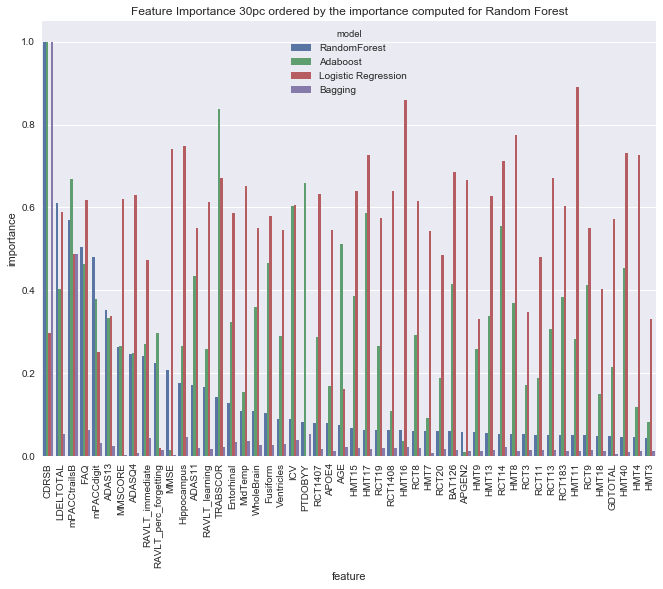

In [45]:
# lets plot the features as ordered by 
sns.set()
plt.figure(figsize=(11,8))
ax = sns.barplot(x = 'feature', y = 'importance', hue = 'model', data = features_30pc_ordered_rf_melt)
#sns.barplot(x = 'feature', y = 'ab', data = features_30pc_ordered_melt.head(40))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 30pc ordered by the importance computed for Random Forest')

Text(0.5,1,'Feature Importance 30pc ordered by the importance computed for Adaboost')

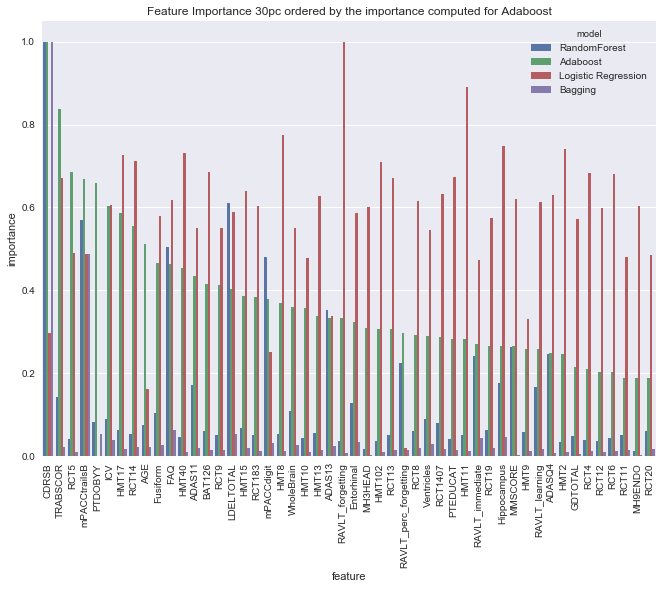

In [12]:
sns.set()
plt.figure(figsize=(11,8))
ax = sns.barplot(x = 'feature', y = 'importance', hue = 'model', data = features_30pc_ordered_ab_melt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 30pc ordered by the importance computed for Adaboost')

Text(0.5,1,'Feature Importance 30pc ordered by the importance computed for Bagging')

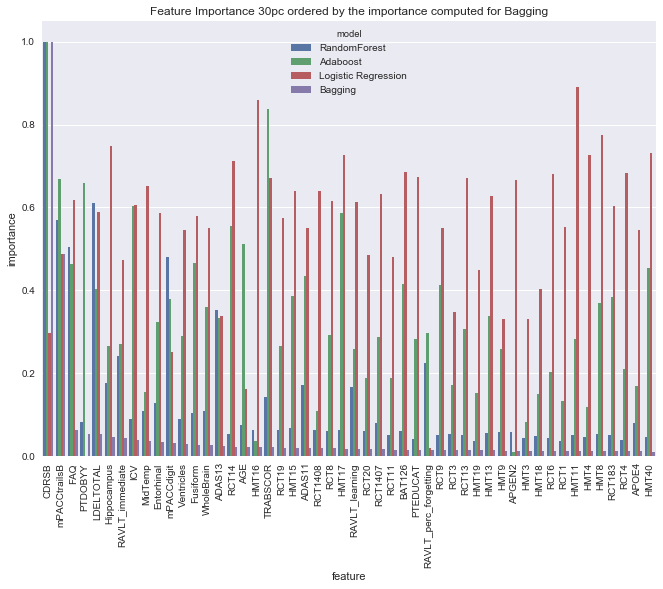

In [13]:
sns.set()
plt.figure(figsize=(11,8))
ax = sns.barplot(x = 'feature', y = 'importance', hue = 'model', data = features_30pc_ordered_bg_melt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 30pc ordered by the importance computed for Bagging')

Text(0.5,1,'Feature Importance 30pc ordered by the importance computed for Logistic Regression')

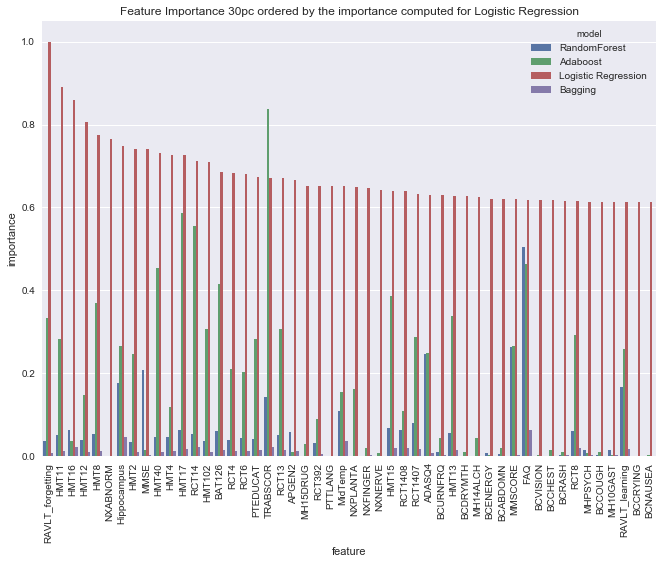

In [14]:
sns.set()
plt.figure(figsize=(11,8))
ax = sns.barplot(x = 'feature', y = 'importance', hue = 'model', data = features_30pc_ordered_lr_melt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Feature Importance 30pc ordered by the importance computed for Logistic Regression')

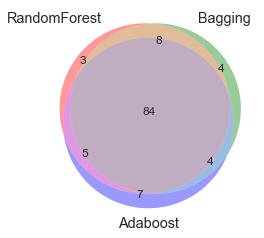

In [48]:
# lets look at the overlap of the top features from all the different models
from matplotlib_venn import venn3
setLabels1 = ['RandomForest','Bagging', 'Adaboost']
setLabels2 = ['RandomForest','Logistic Regression', 'Adaboost']
plt.figure()
ax1 = plt.gca()
v1 = venn3([set(features_30pc_ordered_rf.feature), set(features_30pc_ordered_bg.feature), 
       set(features_30pc_ordered_ab.feature)], set_labels = setLabels1, ax = ax1)


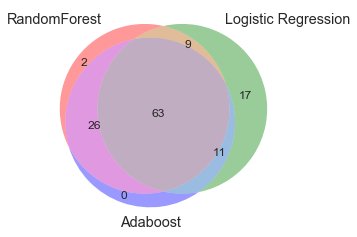

In [49]:
plt.figure()
ax2 = plt.gca()
v2 = venn3([set(features_30pc_ordered_rf.feature), set(features_30pc_ordered_lr.feature), 
       set(features_30pc_ordered_ab.feature)], set_labels = setLabels2, ax = ax2)